In [1]:
import json

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from scipy.ndimage import gaussian_filter1d

In [2]:
# Some constants
ndir = 10 # Number of directions from peeling off

In [3]:
# Load in the data
df = pd.read_csv("../data/all_basic_data.csv")

# Load in the z=6 lya and ha spectra
with open("../data/lya_ha_spec_profs/ha_spec_prof_z6.json") as f:
    ha_dat = json.load(f)
    
with open("../data/lya_ha_spec_profs/lya_spec_prof_z6.json") as f:
    lya_dat = json.load(f)

In [4]:
# Min and max wavelengths for lya and ha spectra
lya_lmin = 1165.67; lya_lmax = 1265.67
ha_lmin = 6512.8; ha_lmax = 6612.8

Text(0, 0.5, '${\\rm Luminosity\\ [erg/s]}$')

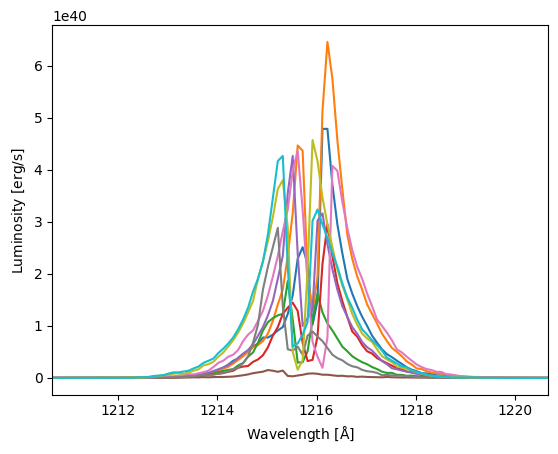

In [5]:
# Make a plot of the Lya spectra of the first z=6 galaxy in the json
gal = "114509"

for i in range(ndir):
    plt.plot(
        lya_dat[gal][f"dir_{i}"]["lya_spectrum_bins"],
        10.**np.array(lya_dat[gal][f"dir_{i}"]["lya_spectrum"]),
    )
    
plt.xlim(1215.67-5,1215.67+5)
plt.xlabel(r"${\rm Wavelength\ [\AA]}$")
plt.ylabel(r"${\rm Luminosity\ [erg/s]}$")

Text(0, 0.5, '${\\rm Luminosity\\ [erg/s]}$')

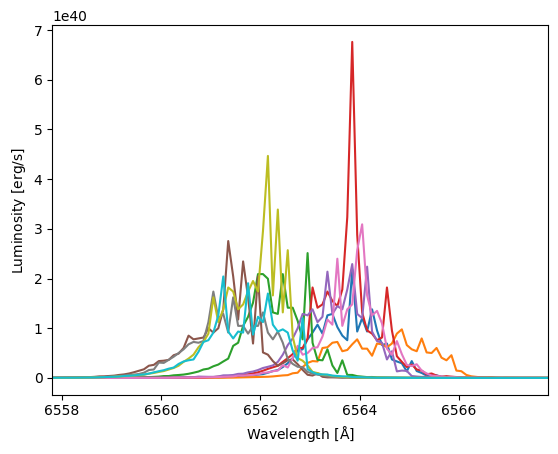

In [6]:
# Do the same for Halpha
# Note that the units are erg/s in the spectral bin which is 0.1A
gal = "114509"

for i in range(ndir):
    plt.plot(
        ha_dat[gal][f"dir_{i}"]["ha_spectrum_bins"],
        10.**np.array(ha_dat[gal][f"dir_{i}"]["ha_spectrum"]),
    )
    
plt.xlim(6562.8-5,6562.8+5)
plt.xlabel(r"${\rm Wavelength\ [\AA]}$")
plt.ylabel(r"${\rm Luminosity\ [erg/s]}$")

Text(0.5, 1.0, '${\\rm H\\alpha\\ Spectra\\ With\\ LSF}$')

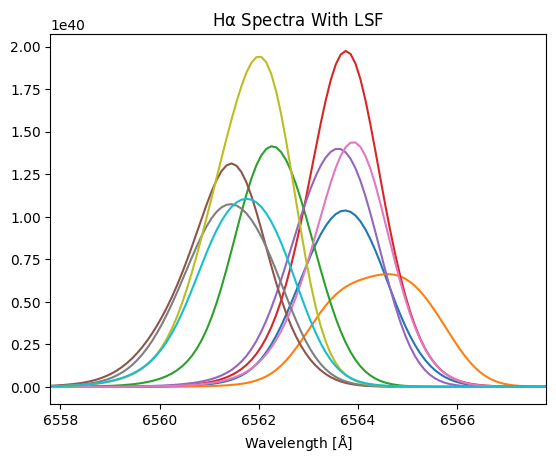

In [7]:
# All of the spectra were run at 0.1A resolution. We can make this plot convolving with a line spread function of 0.5A
# Then it starts to look more realistic :) 

for i in range(ndir):
    plt.plot(
        ha_dat[gal][f"dir_{i}"]["ha_spectrum_bins"],
        gaussian_filter1d(10.**np.array(ha_dat[gal][f"dir_{i}"]["ha_spectrum"]),5)
    )
    
plt.xlim(6562.8-5,6562.8+5)
plt.xlabel(r"${\rm Wavelength\ [\AA]}$")
plt.title(r"${\rm H\alpha\ Spectra\ With\ LSF}$")